## **Installation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **Avg Score for each Hole for each Round**

In [3]:
shot_1 = df.loc[df['shot'] == 1]
avg_round = shot_1.groupby(['player_id', 'round','hole']).agg({'hole_score': 'sum'}).reset_index()
sg_calc = avg_round.groupby(['hole','round'])['hole_score'].mean().reset_index()
sg_calc.rename(columns={'hole_score': 'avg_hole_score_per_round'}, inplace=True)
sg_calc

,hole,round,avg_hole_score_per_round
0,1,1,3.833333
1,1,2,4.033333
2,1,3,4.166667
3,1,4,4.000000
4,2,1,3.066667
...,...,...,...
67,17,4,4.300000
68,18,1,2.900000
69,18,2,3.066667
70,18,3,3.166667


In [4]:
selected_columns = ['player_id', 'last_name', 'round','hole','hole_score','par_value','yardage', 'shot', 'shot_type', 'num_of_strokes',
       'from_location_scorer', 'from_location_laser', 'to_location_scorer',
       'to_location_laser', 'distance', 'distance_to_pin', 'in_the_hole',
       'around_the_green', 'first_putt', 'dist_to_hole_after_shot', 'time',
       'lie', 'elevation', 'slope', 'x', 'y', 'z', 'dist_from_center',
       'dist_from_edge']  # Add the column names you want to select
condensed_df = shot_1[selected_columns].copy()
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,4788,1255,Good,With,Level,"9,093.97","9,859.90",480.316,562,126
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,231,1307,Good,With,Level,"9,211.50","10,024.61",490.756,214,347
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,3440,1315,Good,With,Level,"8,447.83","10,051.84",507.876,127,344
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,5727,1326,Good,With,Level,"8,174.51","9,313.66",514.103,550,278
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,9062,1338,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,4695,1530,Good,With,Level,"11,327.13","9,337.86",508.390,386,47
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,7275,1542,Good,With,Level,"11,623.85","8,969.57",508.009,158,254
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,6993,1558,Good,With,Level,"11,329.40","8,533.72",499.617,326,14
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,5558,1613,Good,With,Level,"10,661.04","9,194.21",480.149,704,266


## **SG for each Hole for each Round for every Player**

In [5]:
# Assuming sg_calc and condensed_df are your DataFrames
condensed_df['sg_per_hole_per_round_per_player'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0] - row['hole_score'],
    axis=1
)

condensed_df['avg_hole_score_per_round'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0],
    axis=1
)

# Display the resulting DataFrame
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,Good,With,Level,"9,093.97","9,859.90",480.316,562,126,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,Good,With,Level,"9,211.50","10,024.61",490.756,214,347,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,Good,With,Level,"8,447.83","10,051.84",507.876,127,344,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,Good,With,Level,"8,174.51","9,313.66",514.103,550,278,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793,-0.766667,4.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,Good,With,Level,"11,327.13","9,337.86",508.390,386,47,0.766667,3.766667
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,Good,With,Level,"11,623.85","8,969.57",508.009,158,254,0.366667,4.366667
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,Good,With,Level,"11,329.40","8,533.72",499.617,326,14,0.166667,4.166667
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,Good,With,Level,"10,661.04","9,194.21",480.149,704,266,-0.700000,4.300000


# **Rolling SG by Round by Hole by Player**

In [6]:
condensed_df = condensed_df.sort_values(by=['player_id', 'round', 'hole'])

# Calculate the rolling sum for each 'player_id'
condensed_df['rolling_sum_sg_per_hole_per_round_per_player'] = condensed_df.groupby('player_id')['sg_per_hole_per_round_per_player'].rolling(window=72, min_periods=1).sum().reset_index(level=0, drop=True)

# Create a new column 'round_hole_combination' with a numeric value representing the combination of 'round' and 'hole'
condensed_df['round_hole_combination'] = (condensed_df['round'] - 1) * 18 + condensed_df['hole']
# Now condensed_df contains a new column 'round_hole_combination' representing the combination of 'round' and 'hole' as a numeric value ranging from 1 to 72.

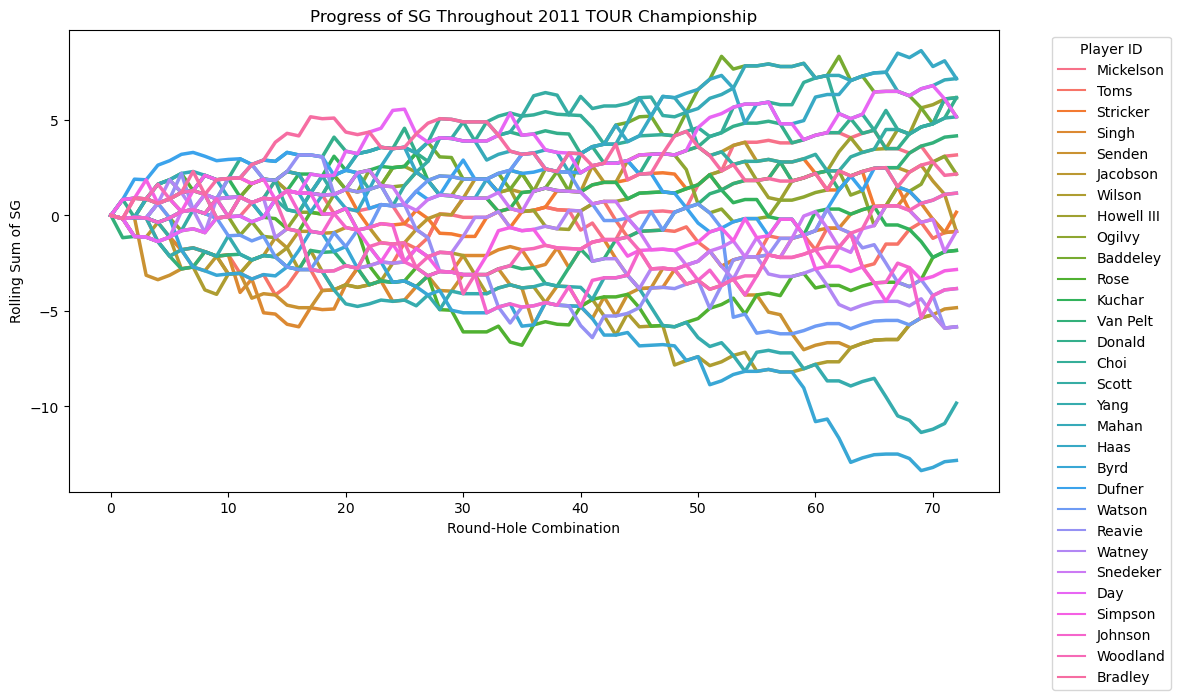

In [7]:
original_df = condensed_df[['last_name', 'round_hole_combination', 'sg_per_hole_per_round_per_player', 'rolling_sum_sg_per_hole_per_round_per_player']]

# Create a new DataFrame with additional rows
extra_rows = pd.DataFrame(columns=original_df.columns)

# Iterate through unique player_ids and add rows with specified conditions
for player_id in original_df['last_name'].unique():
    extra_row = pd.DataFrame({'last_name': [player_id], 'round_hole_combination': [0], 'sg_per_hole_per_round_per_player': [0], 'rolling_sum_sg_per_hole_per_round_per_player': [0]})
    extra_rows = pd.concat([extra_rows, extra_row], ignore_index=True)

# Concatenate the original DataFrame and the new rows
new_df = pd.concat([original_df, extra_rows], ignore_index=True)


palette = sns.color_palette("husl", n_colors=len(new_df['last_name'].unique()))

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=new_df, x='round_hole_combination', y='rolling_sum_sg_per_hole_per_round_per_player', hue='last_name', palette=palette, linewidth=2.5)

# Set labels and title
plt.xlabel('Round-Hole Combination')
plt.ylabel('Rolling Sum of SG')
plt.title('Progress of SG Throughout 2011 TOUR Championship')

# Customize the legend to show more players
plt.legend(title='Player ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

longest sg hot streak
best sg within 3 holes? - for each player? all combos see if a player has multiple hot streaks

longest worst streak

# **put player sg normal dists here**

-- worst and best, maybe do for par 3, 4, and 5s?

# **Course Difficulty**

# Toughest hole

- by par value - SG (higher score, easier hole)

In [8]:
condensed_df['Birdiable_hole_score'] = condensed_df['par_value'] - condensed_df['avg_hole_score_per_round']

unique_combinations_df = condensed_df.drop_duplicates(subset='round_hole_combination')

# Sort the unique combinations DataFrame by 'Birdiable_hole_score'
Birdiable_hole_scores_df = unique_combinations_df.sort_values(by='Birdiable_hole_score', ascending=False)

C:\Users\decla\AppData\Local\Temp\ipykernel_24676\1655714024.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='hole', y='Birdiable_hole_score', data=Birdiable_hole_scores_df, palette='viridis', hue='round', ci='sd')  # ci='sd' adds error bars


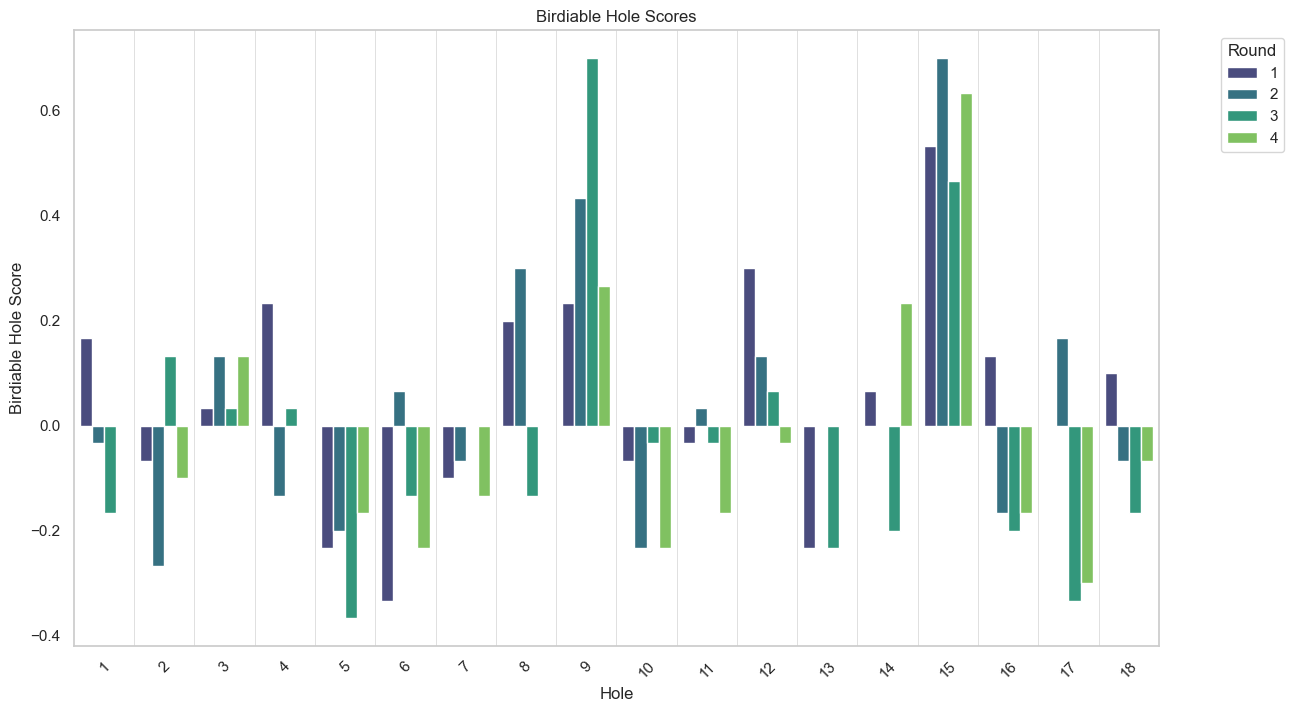

In [9]:
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using seaborn with improved aesthetics
ax = sns.barplot(x='hole', y='Birdiable_hole_score', data=Birdiable_hole_scores_df, palette='viridis', hue='round', ci='sd')  # ci='sd' adds error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Hole')
plt.ylabel('Birdiable Hole Score')
plt.title('Birdiable Hole Scores')

# Move the legend to the upper left for better visibility
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add faint vertical dividers between each hole
ax.set_xticks([i + 0.5 for i in range(len(Birdiable_hole_scores_df['hole'].unique()))], minor=True)
ax.set_xticklabels([], minor=True)
plt.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.5)

# Remove horizontal dividers
ax.yaxis.grid(False)

# Show the plot
plt.show()


# **SG Normal Distributions for each Hole each Round**

In [10]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []

for round_num in range(1, 5):  # Assuming rounds range from 1 to 4
    for hole_num in range(1, 19):  # Assuming holes range from 1 to 18
        list_of_sg_per_hole_per_round_per_players = condensed_df[
            (condensed_df['round'] == round_num) & (condensed_df['hole'] == hole_num)
        ]['sg_per_hole_per_round_per_player'].values.tolist()
        
        params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
        
        result_dict = {
            'round': round_num,
            'hole': hole_num,
            'mean': params[0],
            'std': params[1]
        }

        results_list.append(result_dict)

        # print(f"Round {round_num}, Hole {hole_num}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Easiest Hole of the Champioship

- will compare to birdiable hole score eventually
- rn look oppo of birdiable :/

In [11]:
df_results.sort_values(by='mean', ascending=False).iloc[:5]

,round,hole,mean,std
21,2,4,4.144833e-16,0.763035
60,4,7,4.144833e-16,0.561743
43,3,8,4.144833e-16,0.718022
36,3,1,2.960595e-16,0.582142
69,4,16,2.960595e-16,0.636832


# Toughest Hole of the Champioship


In [12]:
df_results.sort_values(by='mean', ascending=True).iloc[:5]

,round,hole,mean,std
68,4,15,-4.144833e-16,0.706321
40,3,5,-4.144833e-16,0.752034
6,1,7,-3.552714e-16,0.597216
52,3,17,-2.960595e-16,1.043498
26,2,9,-2.368476e-16,0.558768


# Most Consistent Hole of the Champioship

In [13]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,round,hole,mean,std
28,2,11,1.184238e-16,0.314466
37,3,2,2.960595e-17,0.339935
30,2,13,0.000000e+00,0.447214
0,1,1,1.480297e-16,0.453382
12,1,13,5.921189e-17,0.495536


# Least Consistent Hole of the Champioship

In [14]:
df_results.sort_values(by='std', ascending=False).iloc[:5]

,round,hole,mean,std
52,3,17,-2.960595e-16,1.043498
16,1,17,0.000000e+00,0.856349
27,2,10,5.921189e-17,0.803465
21,2,4,4.144833e-16,0.763035
18,2,1,-1.184238e-16,0.752034


In [15]:
hole_stats = df_results.groupby('hole').agg({'mean': ['min', 'max'], 'std': ['min', 'max']})

# Rename the columns for clarity
hole_stats.columns = ['min_mean', 'max_mean', 'min_std', 'max_std']

# Merge hole_stats back to df_results on 'hole'
df_results = pd.merge(df_results, hole_stats, on='hole')

df_results['mean_diff'] = df_results['max_mean'] - df_results['min_mean']
df_results['std_diff'] = df_results['max_std'] - df_results['min_std']

# Largest Flux Holes throughout Championship

In [16]:
top_results = df_results.sort_values(by='std_diff', ascending=False)

top_results_unique_holes = top_results.drop_duplicates(subset='hole')

top_results_unique_holes.iloc[:5]

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
40,1,11,-1.184238e-16,0.657436,-1.480297e-16,1.184238e-16,0.314466,0.687184,2.664535e-16,0.372718
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
16,1,5,5.921189e-17,0.495536,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637


# Smallest Flux Holes throughout Championship

In [17]:
top_results = df_results.sort_values(by='std_diff', ascending=True)

top_results_unique_holes = top_results.drop_duplicates(subset='hole')

top_results_unique_holes.iloc[:5]

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
35,4,9,5.921189e-17,0.628932,-2.368476e-16,5.921189e-17,0.558768,0.628932,2.960595e-16,0.070164
27,4,7,4.144833e-16,0.561743,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
59,4,15,-4.144833e-16,0.706321,-4.144833e-16,1.184238e-16,0.585947,0.706321,5.329071e-16,0.120374
31,4,8,0.000000e+00,0.730297,-1.776357e-16,4.144833e-16,0.600000,0.737111,5.921189e-16,0.137111


# **add means, stds, difdss to condensed_df!!!**

In [18]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters of the normal distribution

# Generate synthetic data from the normal distribution

# Fit the normal distribution to the synthetic data
params = norm.fit(list_of_sg_per_hole_per_round_per_players)



print("Fitted Mean:", params[0])
print("Fitted Standard Deviation:", params[1])

Fitted Mean: 2.0724163126336256e-16
Fitted Standard Deviation: 0.6289320754704403


In [19]:
^ ok now do thus for every hole in everyround, then look at which holes had the highest fluxation in variance by subtracting the min and max variance for eeach round of each hole, guessing most variance be be on a tough pin placement on a par three that could depend on wind

then split inot back and front nine preformance for each day

SyntaxError: invalid syntax (224486229.py, line 1)

hardest 3 holes in a row - amen corner stat

easiest 3 holes